# <u>Homework:</u> Solving the Knapsack Problem

By **Sepanta FARZOLLAHI (50%)** and **Yacine ABDELOUHAB (50%)**


## Description of the Context: Bounded Knapsack Problem

You are given a set of items, each with an associated value and weight, and a knapsack with a maximum weight capacity. Each item is available a certain number of times. The goal is to determine the most valuable combination of items to place in the knapsack without exceeding its weight capacity.

**Problem Parameters:**

- **Set of Items:** There is a finite set of items, often denoted as $I = \{1, 2, \ldots, n\}$.

- **Item Properties:**
  - Each item $i$ has an associated value $v_i$ (positive real number), representing the profit gained by including the item in the knapsack.
  - Each item $i$ has an associated weight $w_i$ (positive real number), indicating the weight of the item.
  - Each item $i$ has an associated maximum quantity $b_i$ (a non-negative integer), specifying the maximum number of times that item can be selected.

- **Knapsack Capacity:** The knapsack has a maximum weight capacity, denoted as $W$ (a positive real number).

**Objective:**

The objective of the bounded knapsack problem is to determine a selection of items, taking into account the quantity bounds, that maximizes the total value of the selected items while ensuring that the total weight does not exceed the knapsack's capacity.


## I. Fractional Bounded Knapsack

In the fractional version of the problem, you are allowed to break items into bits as tiny as you wish for.


**Q1.** Write a function `knapfrac(values, weights, quantities, capacity)` whose arguments are:
 - a list of values (values of items),
 - a list of weights (weights of items),
 - and a list of bounds (upper bounds on the number of items of each type),
 - an integer capacity (maximum weight the knapsack can hold),

 and which returns the maximum value of a fractional knapsak.

In [ ]:
import math
import time
import timeit
import pytest
import random
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
def knapfrac(values, weights, quantities, capacity):
  '''
  Calculate an upper bound for the maximum value of items that can be taken in
  the knapsack using a fractional approach.

  Parameters:
  values (list of int): The values of each item.
  weights (list of int): The weights of each item.
  quantities (list of int): The maximum quantities available for each item.
  capacity (int): The total capacity of the knapsack.

  Returns:
  float: The upper bound for the maximum possible value in the knapsack.
  '''
  # Find the value-to-weight ratio for each item and stock it in a list of tuples
  try:
    ratio = [(values[i] / weights[i], weights[i], quantities[i], i) for i in range(len(values))]
  except ZeroDivisionError:
    print("One of the item's weight is null ! Update your value and run again the function !")
    return 0.0

  # Sort items in descending order by their value-to-weight ratio
  ratio.sort(reverse=True, key=lambda x: x[0])
  max_value = 0.0
  remaining_capacity = capacity
  # Iterate over items by their value-to-weight ratio
  for value_per_weight, weight, quantity, index in ratio:
    if remaining_capacity <= 0:
      break # Stop if the knapsack is already full
    # Determine how many of this item can be taken
    max_take_quantity = min(quantity, remaining_capacity / weight)
    # Update the maximum value and the quantities taken
    max_value += value_per_weight * weight * max_take_quantity
    # Reduce the remaining capacity
    remaining_capacity -= max_take_quantity * weight
  return max_value

**Q2.** Enhance the previous function so that it also outputs an associated solution of optimum value.

In [ ]:
def knapfrac_enhanced(values, weights, quantities, capacity):
    '''
    Calculate the maximum possible value in a bounded knapsack using a fractional
    approach.

    Parameters:
    values (list of int): The values of each item.
    weights (list of int): The weights of each item.
    quantities (list of int): The maximum quantities available for each item.
    capacity (int): The total capacity of the knapsack.

    Returns:
    tuple: A tuple containing:
        - float: The maximum value that can be achieved with the given capacity.
        - list of float: The quantities of each item taken (can include fractional quantities).
    '''
    # Find the value-to-weight ratio for each item and stock it in a list of tuples
    try:
      ratio = [(values[i] / weights[i], weights[i], quantities[i], i) for i in range(len(values))]
    except ZeroDivisionError:
      print("One of the item's weight is null ! Update your value and run again the function !")
      return 0.0,[]

    # Sort items in descending order by their value-to-weight ratio
    ratio.sort(reverse=True, key=lambda x: x[0])
    max_value = 0.0
    remaining_capacity = capacity
    quantities_taken = [0] * len(values)  # To track the quantities taken (including fractions)
    # Iterate over items by their value-to-weight ratio
    for value_per_weight, weight, quantity, index in ratio:
        if remaining_capacity <= 0:
            break  # Stop if the knapsack is already full
        # Determine how much of this item can be taken (full or fractional)
        # The maximum quantity we can take of this item given the capacity left
        can_take = min(quantity, remaining_capacity / weight)
        if can_take > 0:
            # Full items
            max_value += value_per_weight * weight * can_take
            quantities_taken[index] += can_take
            remaining_capacity -= can_take * weight
        # Check if we can take a fractional part of this item
        if remaining_capacity > 0 and can_take < quantity:
            # We take a fraction of the remaining item
            fraction = remaining_capacity / weight
            max_value += value_per_weight * weight * fraction
            quantities_taken[index] += fraction
            remaining_capacity -= fraction * weight
    return max_value, quantities_taken

**Q3.** Test your implementation with suitable choices of values, weights, quantities, and capacities to ensure that it works correctly.

In [ ]:
def run_tests_frac():
    # Test 1: Small items with moderate capacity
    values, weights, quantities, capacity = [80, 90, 100], [10, 20, 30], [3, 3, 2], 60
    max_value, quantities_taken = knapfrac_enhanced(values, weights, quantities, capacity)
    assert max_value == 375, f"Test 1 failed: expected 375, got {max_value}"
    assert quantities_taken == [3, 1.5, 0], f"Test 1 failed: expected [3, 1.5, 0], got {quantities_taken}"

    # Test 2: Small capacity with high-value items
    values, weights, quantities, capacity = [300, 500, 700], [20, 25, 30], [1, 1, 1], 50
    max_value, quantities_taken = knapfrac_enhanced(values, weights, quantities, capacity)
    assert max_value == 1100, f"Test 2 failed: expected 1100, got {max_value}"
    assert quantities_taken == [0, 0.8, 1], f"Test 2 failed: expected [0, 0.8, 1], got {quantities_taken}"

    # Test 3: Larger capacity and more items
    values, weights, quantities, capacity = [120, 150, 80, 200], [40, 50, 30, 60], [5, 4, 6, 3], 150
    max_value, quantities_taken = knapfrac_enhanced(values, weights, quantities, capacity)
    assert max_value == 500, f"Test 3 failed: expected 500, got {max_value}"
    assert quantities_taken == [0, 0, 0, 2.5], f"Test 3 failed: expected [0, 0, 0, 2.5], got {quantities_taken}"

    # Test 4: Edge case with very small capacity
    values, weights, quantities, capacity = [200, 300, 400], [100, 100, 100], [1, 1, 1], 50
    max_value, quantities_taken = knapfrac_enhanced(values, weights, quantities, capacity)
    assert max_value == 200, f"Test 4 failed: expected 200, got {max_value}"
    assert quantities_taken == [0, 0, 0.5], f"Test 4 failed: expected [0, 0, 0.5], got {quantities_taken}"

    # Test 5: Test where all items are used fractionally
    values, weights, quantities, capacity = [100, 200, 300], [10, 20, 40], [10, 10, 10], 60
    max_value, quantities_taken = knapfrac_enhanced(values, weights, quantities, capacity)
    assert max_value == 600, f"Test 5 failed: expected 600, got {max_value}"
    assert quantities_taken == [6, 0, 0], f"Test 5 failed: expected [6, 0, 0], got {quantities_taken}"

    # Test 6: Large capacity with different item sizes
    values, weights, quantities, capacity = [500, 600, 700, 800, 900], [100, 150, 200, 250, 300], [1, 2, 3, 1, 2], 500
    max_value, quantities_taken = knapfrac_enhanced(values, weights, quantities, capacity)
    assert max_value == 2050, f"Test 6 failed: expected 2050, got {max_value}"
    assert quantities_taken == [1, 2, 0.5, 0, 0], f"Test 6 failed: expected [1, 2, 0.5, 0, 0], got {quantities_taken}"

    # Test 7: All items exceed capacity
    values, weights, quantities, capacity = [300, 400, 500], [200, 300, 400], [1, 1, 1], 100
    max_value, quantities_taken = knapfrac_enhanced(values, weights, quantities, capacity)
    assert max_value == 150, f"Test 7 failed: expected 150, got {max_value}"
    assert quantities_taken == [0.5, 0, 0], f"Test 7 failed: expected [0.5, 0, 0], got {quantities_taken}"

    # Test 8: Very large capacity
    values, weights, quantities, capacity = [100, 200, 300], [10, 20, 30], [10, 10, 10], 1000
    max_value, quantities_taken = knapfrac_enhanced(values, weights, quantities, capacity)
    assert max_value == 6000, f"Test 8 failed: expected 6000, got {max_value}"
    assert quantities_taken == [10, 10, 10], f"Test 8 failed: expected [10, 10, 10], got {quantities_taken}"

    # Test 9: Randomized test
    import random
    values = [random.randint(1, 100) for _ in range(10)]
    weights = [random.randint(1, 20) for _ in range(10)]
    quantities = [random.randint(1, 5) for _ in range(10)]
    capacity = random.randint(50, 100)
    try:
        max_value, quantities_taken = knapfrac_enhanced(values, weights, quantities, capacity)
    except Exception as e:
        print(f"Test 9 failed with exception: {e}")

    print("All tests passed!")

# Run the tests directly
run_tests_frac()

All tests passed!


# II. Bounded Knapsack Dynamically

**Q0.** Provide and explain a recurrence relation which the bounded knapsack problem satisfies.

**Answer :**
Let:

- $v_1, v_2, \dots, v_n$ be the values of the items,
- $w_1, w_2, \dots, w_n$ be the weights of the items,
- $b_1, b_2, \dots, b_n$ be the maximum quantities of each item that can be included in the knapsack,
- $\mathcal{W}$ be the maximum capacity of the knapsack.

Suppose that the function $\text{knapdyn}(V, W, B, \mathcal{W})$ returns the solution to the problem. Then we have:

$$
knapdyn(V, W, B, \mathcal{W}) = \max_{i \in [0, b_1]} \left\{ i \cdot v_1 + knapdyn([v_2, \dots, v_n], [w_2, \dots, w_n], [b_2, \dots, b_n], \mathcal{W} - i \cdot w_1) \quad | \quad \mathcal{W} - i \cdot w_1 \geq 0\right\}
$$


In fact, we are sure that the global solution has:

$$
x_1 = 0 \quad \text{or} \quad x_1 = 1 \quad \text{or} \quad \dots \quad \text{or} \quad x_1 = b_1
$$
where $x_1$ represents the quantity taken for item 1.

The global optimal solution corresponds to the potential subproblems associated with each possibility enumerated above, which are:

$$
(i) \quad 0 \cdot v_1 + knapdyn([v_2, \dots, v_n], [w_2, \dots, w_n], [b_2, \dots, b_n], \mathcal{W} - 0 \cdot w_1) \quad \text{(if \( \mathcal{W} - 0 \cdot w_1 \geq 0 \), otherwise we ignore this possibility)}
$$
$$
\vdots
$$
$$
(b_1) \quad b_1 \cdot v_1 + knapdyn([v_2, \dots, v_n], [w_2, \dots, w_n], [b_2, \dots, b_n], \mathcal{W} - b_1 \cdot w_1) \quad \text{(if \( \mathcal{W} - b_1 \cdot w_1 \geq 0 \))}
$$

We can generalize this observation for any $j \in \{1, \dots, n\}$:

$$
knapdyn(V, W, B, \mathcal{W}) = \max_{i \in [0, b_j]} \left\{ i \cdot v_j + knapdyn(V \setminus \{v_j\}, W \setminus \{w_j\}, B \setminus \{b_j\}, \mathcal{W} - i \cdot w_j) \quad | \quad \mathcal{W} - i \cdot w_j \geq 0\right\}
$$


**Q1.** Write a function `knapdyn(values, weights, quantities, capacity)` which returns the maximum value of a bounded knapsack problem.

In [ ]:
def knapdyn(values, weights, quantities, capacity):
    '''
    Solves the knapsack problem using recursion by finding the maximum possible value
    that can be obtained without exceeding the given capacity.

    Parameters:
    - values (list of int): The values associated with each item type.
    - weights (list of int): The weights associated with each item type.
    - quantities (list of int): The maximum number of items available for each item type.
    - capacity (int): The total capacity of the knapsack.

    Returns:
    - int: The maximum value achievable without exceeding the knapsack's capacity.
    '''

    # Base case: return 0 if no items are left or capacity is exhausted
    if len(values) == 0 or capacity == 0:
        return 0

    # Initialize a list to store possible values for different quantities of the first item
    # Each entry in `tab` holds the value for `i` items of the first type, plus the solution to the remaining subproblem
    tab = []
    for i in range(quantities[0] + 1):  # Loop over possible quantities from 0 to `quantities[0]`
        if weights[0] * i <= capacity:  # Check if `i` items can fit within the remaining capacity
            # Append the total value for taking `i` items of the first type, plus the result of the subproblem
            tab.append(values[0] * i + knapdyn(values[1:], weights[1:], quantities[1:], capacity - weights[0] * i))
        else:
            # Stop if `i` items exceed capacity, as higher quantities will also exceed it
            break

    # Return the max value from `tab`, or 0 if `tab` is empty (no items could be added)
    if len(tab) == 0:
      return 0
    return max(tab)

**Q2.** Enhance `knapdyn` into an efficient function `knapdynMem` which uses memoization.

In [ ]:
def knapdynMem(values, weights, quantities, capacity, data = None):
    '''
    Solves the knapsack problem with memoization by finding the maximum possible
    value that can be obtained without exceeding the given capacity.

    Parameters:
    - values (list of int): The values associated with each item type.
    - weights (list of int): The weights associated with each item type.
    - quantities (list of int): The maximum number of items available for each item type.
    - capacity (int): The total capacity of the knapsack.
    - data (dict): A dictionary to store intermediate results for memoization (default is None).

    Returns:
    - int: The maximum value achievable without exceeding the knapsack's capacity.
    '''

    if data == None:
      data = {}

    # Base case: return 0 if no items are left or capacity is exhausted
    if len(values) == 0 or capacity == 0:
        return 0

    # Have we already solve the problem ?
    key = (len(values), capacity)
    if key in data:
      return data[key]

    # Initialize a list to store possible values for different quantities of the first item
    # Each entry in `tab` holds the value for `i` items of the first type, plus the solution to the remaining subproblem
    tab = []
    for i in range(quantities[0] + 1):  # Loop over possible quantities from 0 to `quantities[0]`
        if weights[0] * i <= capacity:  # Check if `i` items can fit within the remaining capacity
            # Append the total value for taking `i` items of the first type, plus the result of the subproblem
            tab.append(values[0] * i + knapdynMem(values[1:], weights[1:], quantities[1:], capacity - weights[0] * i, data))
        else:
            # Stop if `i` items exceed capacity, as higher quantities will also exceed it
            break

    # Return the max value from `tab`, or 0 if `tab` is empty (no items could be added)
    if len(tab) == 0:
      data[key] = 0
      return 0
    data[key] = max(tab)
    return data[key]

**Q3.** Modify the previous functions so that they also output an associated solution of optimum value.

In [ ]:
def knapdynMem_enhanced(values, weights, quantities, capacity, data=None):
    '''
    Solves the knapsack problem with memoization by finding the maximum value achievable
    within the given capacity and returns both the maximum value and the list of selected item quantities.

    Parameters:
    - values (list of int): The values associated with each item type.
    - weights (list of int): The weights associated with each item type.
    - quantities (list of int): The maximum number of items available for each item type.
    - capacity (int): The total capacity of the knapsack.
    - data (dict): A dictionary to store intermediate results for memoization (default is None).

    Returns:
    - tuple: A tuple containing the maximum value achievable and a list of selected item quantities.
    '''

    if data is None:
        data = {}

    # Base case: return 0 if no items are left or capacity is exhausted
    if len(values) == 0 or capacity == 0:
        return 0, [0] * len(values)

    # Have we already solved the problem ?
    key = (len(values), capacity)
    if key in data:
        return data[key]

    # Initialize a list to store possible values for different quantities of the first item
    tab = []
    for i in range(quantities[0] + 1):  # Loop over possible quantities from 0 to `quantities[0]`
        if weights[0] * i <= capacity:  # Check if `i` items can fit within the remaining capacity
            # Append the total value for taking `i` items of the first type, plus the result of the subproblem
            sub_problem = knapdynMem_enhanced(values[1:], weights[1:], quantities[1:], capacity - weights[0] * i, data)
            selected_quantities = [i] + sub_problem[1]  # Add the current selection and the subproblem result
            tab.append((values[0] * i + sub_problem[0], selected_quantities))
        else:
            break  # Stop if `i` items exceed capacity

    # Return the max value from `tab`, or 0 if `tab` is empty (no items could be added)
    if len(tab) == 0:
        data[key] = 0, [0] * len(values)  # Ensure the list has the same length as the number of items
        return data[key]

    best_value, best_quantities = max(tab, key=lambda x: x[0])
    data[key] = best_value, best_quantities
    return data[key]

**Q4.** Devise a suitable set of test instances, and use them compare the performances of your functions with timit.

In [ ]:
def run_tests():
    test_cases = [
        # Simple case
        {
            "values": [60, 100, 120],
            "weights": [10, 20, 30],
            "quantities": [2, 1, 3],
            "capacity": 50,
            "description": "Simple case",
        },
        # Medium case
        {
            "values": [60, 100, 120, 50, 80],
            "weights": [10, 20, 30, 5, 10],
            "quantities": [2, 2, 3, 5, 4],
            "capacity": 100,
            "description": "Medium case",
        },
        # Large case
        {
            "values": [i * 10 for i in range(1, 21)],
            "weights": [i * 2 for i in range(1, 21)],
            "quantities": [5 for _ in range(20)],
            "capacity": 100,
            "description": "Large case",
        },
        # Edge case: zero capacity
        {
            "values": [60, 100, 120],
            "weights": [10, 20, 30],
            "quantities": [2, 1, 3],
            "capacity": 0,
            "description": "Edge case (zero capacity)",
        },
        # Edge case: zero items
        {
            "values": [],
            "weights": [],
            "quantities": [],
            "capacity": 50,
            "description": "Edge case (zero items)",
        },
        # Heavy items only
        {
            "values": [500, 600, 700],
            "weights": [300, 400, 500],
            "quantities": [1, 1, 1],
            "capacity": 1000,
            "description": "Heavy items only",
        },
        # Low-value items
        {
            "values": [1, 1, 1],
            "weights": [10, 10, 10],
            "quantities": [10, 10, 10],
            "capacity": 20,
            "description": "Low-value items",
        },
        # High-value, low-weight items
        {
            "values": [1000, 2000, 3000],
            "weights": [1, 1, 1],
            "quantities": [1, 1, 1],
            "capacity": 2,
            "description": "High-value, low-weight items",
        },
        # Large capacity
        {
            "values": [50, 60, 70],
            "weights": [10, 20, 30],
            "quantities": [100, 100, 100],
            "capacity": 5000,
            "description": "Large capacity",
        },
        # Items with zero value
        {
            "values": [0, 0, 0],
            "weights": [10, 20, 30],
            "quantities": [5, 5, 5],
            "capacity": 100,
            "description": "Items with zero value",
        },
    ]

    for i, test in enumerate(test_cases, 1):
        values = test["values"]
        weights = test["weights"]
        quantities = test["quantities"]
        capacity = test["capacity"]
        description = test["description"]

        print(f"Test Case {i}: {description}")

        # Timing the knapdyn function (recursive)
        dyn_time = timeit.timeit(
            lambda: knapdyn(values, weights, quantities, capacity),
            number=10,
        )
        # Timing the knapdynMem function (memoized)
        dyn_mem_time = timeit.timeit(
            lambda: knapdynMem(values, weights, quantities, capacity),
            number=10,
        )

        # Checking the returned values
        dyn_value = knapdyn(values, weights, quantities, capacity)
        dyn_mem_value = knapdynMem(values, weights, quantities, capacity)

        print(f"  knapdyn (recursive): Time = {dyn_time:.6f} seconds, Value = {dyn_value}")
        print(f"  knapdynMem (memoized): Time = {dyn_mem_time:.6f} seconds, Value = {dyn_mem_value}")

        # Validate that both methods return the same value
        assert dyn_value == dyn_mem_value, f"Values mismatch in test case {i}!"
        print("  ✅ Values are consistent.\n")

# Run all tests
run_tests()

Test Case 1: Simple case
  knapdyn (recursive): Time = 0.000182 seconds, Value = 240
  knapdynMem (memoized): Time = 0.000196 seconds, Value = 240
  ✅ Values are consistent.

Test Case 2: Medium case
  knapdyn (recursive): Time = 0.009220 seconds, Value = 740
  knapdynMem (memoized): Time = 0.002079 seconds, Value = 740
  ✅ Values are consistent.

Test Case 3: Large case
  knapdyn (recursive): Time = 58.978237 seconds, Value = 500
  knapdynMem (memoized): Time = 0.030768 seconds, Value = 500
  ✅ Values are consistent.

Test Case 4: Edge case (zero capacity)
  knapdyn (recursive): Time = 0.000006 seconds, Value = 0
  knapdynMem (memoized): Time = 0.000006 seconds, Value = 0
  ✅ Values are consistent.

Test Case 5: Edge case (zero items)
  knapdyn (recursive): Time = 0.000005 seconds, Value = 0
  knapdynMem (memoized): Time = 0.000005 seconds, Value = 0
  ✅ Values are consistent.

Test Case 6: Heavy items only
  knapdyn (recursive): Time = 0.000131 seconds, Value = 1300
  knapdynMem (mem

# III. Knapsack by Branch and Bound

Branch and bound is a general algorithmic technique used for solving optimization problems, including the knapsack problem. It systematically explores a search tree of potential solutions, pruning branches that cannot lead to an optimal solution.

The primary steps in the branch and bound approach are as follows:

 - **Branching:** The problem space is divided into smaller subproblems, typically through binary choices. For example, in the knapsack problem, each item can be either included (1) or excluded (0).

 - **Bounding:** At each node in the search tree, an upper bound on the optimal solution is computed. If the bound is worse than the current best solution found, that branch of the tree is pruned, as it cannot lead to an optimal solution.

 - **Backtracking:** The algorithm explores promising branches while keeping track of the best solution found so far. When it reaches a leaf node, it updates the best solution if a better one is found.

**Q1.** Which of the previous functions can be used to obtain an upper bound at each node?

**Answer :**
The `knapfrac` function, where fractions of items can be taken, can be used to obtain an upper bound at each node in the branch-and-bound approach, as it provides the optimal solution for a relaxed version of the problem where fractional items are allowed. Since this solution ignores integer constraints, it generally gives an optimal value that is higher than or equal to that of the discrete knapsack problem.

However, the `knapdynMem` function (the memoized dynamic programming solution) could also be used to estimate the exact solution by efficiently calculating the maximum value achievable with the remaining capacity and items. However, this approach may take much more time than `knapfrac` even if it is more precise (it gives the solution)!

**Q2.** Write a function `knapBnB(values, weights, quantities, capacity)`  which returns the maximum value of a bounded knapsack problem with a branch and bound approach.

In [ ]:
# ------------------------------------------------------------------------------
# The Branch-and-Bound (BnB) approach is utilized here for a bounded knapsack problem,
# maximizing the total item value while adhering to a weight limit.
# This diagram demonstrates how fractional solutions assist in estimating potential values:
#
# (FFTR: Frac For The Rest of Items)
#                                [Root : Fractional Solution]
#                                /                          \
# item1?                     [0, FFTR]      ...          [q1max, FFTR]
#                            /      \                      /         \
# item2?             [0,0,FFTR] . [0,q2max,FFTR]  [q1max,0, FFTR] . [q1max,q2max, FFTR]
#                       / \             /\               /\                 /\
#
#
# - **Tree Explanation**:
#   * Each node represents a decision regarding how many quantities of a particular item to include.
#   * The root node represents the initial state, where no items are taken.
#
# - **Tree Bound Explanation**:
#   * The entire tree maintains a global Lower Bound (LB) and Upper Bound (UB):
#     - **Lower Bound**: The current best solution using only integer quantities among the explored nodes.
#                        Each Node has "an int_value" : It is the value of the knapsack with (E(x1), E(x2), ..., E(xn)) where E() is the integer part
#                        and (x1, ..., xn) the quantity taken in the node.
#                        So, the lower bound is just the max of all the int_value, from each explored node.
#     - **Upper Bound**: The maximum achievable value, calculated using a "sub-fractional knapsack solution" (allowing fractional items for estimation).
#
# - **Key Concepts**:
#   1. **Branching**: Each decision expands into branches, representing different choices for item quantities (0, 1, 2, ...).
#   2. **Bounding**:
#      - **Lower Bound**: Tracks the best integer solution found so far in the search.
#      - **Upper Bound**: Provides an estimate of the best possible value, even allowing fractional items to predict potential solutions.
#   3. **Pruning**: Nodes that cannot potentially improve the best integer solution (LB) are discarded, focusing the search.
#
# - The search continues until the Lower and Upper Bounds converge, indicating that the optimal solution has been identified.
#
# - The BnB algorithm efficiently narrows down the search space by leveraging the bounds, ensuring that non-promising paths are quickly eliminated.
# ------------------------------------------------------------------------------

In [ ]:
def knapFrac_opt_arg(values, weights, quantities, capacity):
    '''
    WARNING : We suppose that the input has the following order
              values[i]/weigths[i] <= values[j]/weigths[j] for all i<=j

    Solves a fractional knapsack problem with limited stock of items, maximizing the value of items
    that can fit in the knapsack up to its weight capacity. Allows taking partial quantities of items
    (in fact we are in the continuous case).

    Parameters:
    ----------
    values : list
        A list of the total values for each item. `values[i]` is the total value of item i.

    weights : list
        A list of the total weights for each item. `weights[i]` is the total weight of item i.

    quantities : list
        A list of available quantities for each item. `quantities[i]` is the maximum units of item i
        available to add to the knapsack.

    capacity : float
        The maximum weight capacity of the knapsack.

    Returns:
        tuple :
            - max_value (float) : The maximum total value achieved by selecting items to fit within the weight capacity.
            - value_int (float) : The value obtained if items are taken only in whole quantities.
            - weight_knap (float) : The total weight of items actually taken, accounting for fractional quantities.
            - quantities_taken (list) : The quantity taken for each item, possibly fractional.
    '''

    # Step 1: Calculate the value-to-weight ratio for each item.
    # Store tuples of (value-to-weight ratio, weight, quantity, index) for each item.
    ratio = [(values[i] / weights[i], weights[i], quantities[i], i) for i in range(len(values))]

    # Step 2: Initialize the maximum value and the remaining capacity of the knapsack.
    max_value = 0.0
    remaining_capacity = capacity

    # Step 3: Prepare a list to record the quantities actually taken for each item.
    quantities_taken = [0] * len(values)

    # Step 4: Iterate through items based on their value-to-weight ratio
    # to maximize the value packed in the knapsack.
    for value_per_weight, weight, quantity, index in ratio:

        # Stop if the knapsack is full.
        if remaining_capacity <= 0:
            break

        # Calculate the maximum quantity of the current item that can be added,
        # limited by either the stock available or the remaining knapsack capacity.
        max_take_quantity = min(quantity, remaining_capacity / weight)

        # Update the total value with the value of the taken quantity.
        max_value += value_per_weight * weight * max_take_quantity

        # Record the quantity taken for this item.
        quantities_taken[index] += max_take_quantity

        # Reduce the remaining knapsack capacity.
        remaining_capacity -= max_take_quantity * weight

    # Step 5: Calculate the integer-based solution value (whole quantities only).
    value_int = sum([int(quantities_taken[i]) * values[i] for i in range(len(values))])

    # Calculate the total weight of items taken.
    weight_knap = sum([quantities_taken[i] * weights[i] for i in range(len(weights))])

    # Return the computed results.
    return max_value, value_int, weight_knap, quantities_taken

class Node:
    # Class attributes for item values, weights, quantities, and knapsack capacity
    tab_values = None #Values of each items
    tab_weights = None #Weight of each items
    tab_quantities = None #Quantities of each items
    capacity = 0 #Capacity of the knapsack

    def __init__(self, value, value_int, weight, nbr_items, father, root=False, tab_values=None, tab_weights=None, tab_quantities=None, capacity=0):
        '''
        Initialize a Node instance.

        Parameters:
        - value (float): Total value of the current node's solution.
        - value_int (float): Integer solution value at the node (no fractions).  It is the value of the knapsack with (E(x1),E(x2),...E(xn)) where E() is the integer part
                             and (x1,...xn) the quantity taken in the node.
        - weight (float): Total weight of the knapsack at the node.
        - nbr_items (list[int]): Quantities of items included in the solution.
        - father (Node): Parent node in the tree.
        - root (bool): Flag to indicate if this is the root node.
        - tab_values (list[float], optional): Values of the items (only for root).
        - tab_weights (list[float], optional): Weights of the items (only for root).
        - tab_quantities (list[int], optional): Quantities of the items (only for root).
        - capacity (int, optional): Capacity of the knapsack (only for root).
        '''

        if root:
            # If this is the root node, initialize the sorted values, weights, and quantities

            # Sort items based on value-to-weight ratio in descending order
            # We do this to use knapFrac without always sorting the input
            ratio = [(tab_values[i] / tab_weights[i], tab_weights[i], tab_quantities[i], tab_values[i]) for i in range(len(tab_values))]
            ratio.sort(reverse=True, key=lambda x: x[0])

            # Update class attributes with sorted values, weights, and quantities
            # They are the data of our problem
            Node.tab_values = [v for (_, _, _, v) in ratio]
            Node.tab_weights = [w for (_, w, _, _) in ratio]
            Node.tab_quantities = [q for (_, _, q, _) in ratio]
            Node.capacity = capacity

            # Use the fractional knapsack algorithm to calculate an initial optimal solution
            self.value, self.value_int, self.weight, self.nbr_items = knapFrac_opt_arg(Node.tab_values, Node.tab_weights, Node.tab_quantities, Node.capacity)
            self.father = None
            self.profondeur = 0  # Depth of the node in the tree

        else:
            # For non-root nodes, simply store the provided values
            self.value = value
            self.value_int = value_int
            self.weight = weight
            self.nbr_items = nbr_items
            self.father = father
            self.profondeur = father.profondeur + 1  # Depth increases by 1 from parent node

    def expandNode(self, lowerbound):
        '''
        Expand the current node to generate child nodes.

        Parameters:
        - lowerbound (float): Minimum value threshold for considering new nodes.

        Returns:
        - list[Node]: List of child nodes meeting the lower bound.
        '''

        tab = []  # List to store expanded nodes
        # Calculate current knapsack weight and value based on the first items necessarily included so far
        #At each depth i, we consider the integer solution for the first i item(s) and the continuous solution for the remaining items.
        weight_sub_knapsack = sum([self.nbr_items[j] * Node.tab_weights[j] for j in range(self.profondeur)])
        value_sub_knapsack = sum([self.nbr_items[j] * Node.tab_values[j] for j in range(self.profondeur)])
        qt_item_sub_knapsack = self.nbr_items[:self.profondeur]  # Quantities of items included so far

        # Expand the current node by adding possible quantities of next items by using knapsackFrac
        for i in range(Node.tab_quantities[self.profondeur] + 1):
            # Check if there's enough capacity to add `i` units of the next item
            if Node.capacity - weight_sub_knapsack - i * Node.tab_weights[self.profondeur] >= 0:
                # Calculate optimal solution for the remaining capacity using fractional knapsack
                value_new_node, value_int_new_node, weight_new_node, qt_item_new_node = knapFrac_opt_arg(
                    Node.tab_values[self.profondeur + 1:],
                    Node.tab_weights[self.profondeur + 1:],
                    Node.tab_quantities[self.profondeur + 1:],
                    Node.capacity - weight_sub_knapsack - i * Node.tab_weights[self.profondeur]
                )
            else:
                # Stop expansion if adding any more units would exceed capacity
                break

            # Update the solution by adding the contribution of `i` units of the current item
            value_new_node += value_sub_knapsack + i * Node.tab_values[self.profondeur]
            value_int_new_node += value_sub_knapsack + i * Node.tab_values[self.profondeur]
            weight_new_node += weight_sub_knapsack + i * Node.tab_weights[self.profondeur]
            qt_item_new_node = qt_item_sub_knapsack + [i] + qt_item_new_node  # Update quantities

            # Add new node to `tab` if it meets the lowerbound
            if value_new_node >= lowerbound:
                tab.append(Node(value_new_node, value_int_new_node, weight_new_node, qt_item_new_node, self))

        return tab


class Tree:

    def __init__(self, root):
        '''
        Initialize a Tree instance.

        Parameters:
        - root (Node): The root node of the tree.
        '''

        self.root = root
        self.upperbound = root.value  # Initial upper bound is the root's value
        self.lowerbound = root.value_int  # Initial lower bound is the root's integer value

    def update_frontier(self, frontier, expandNode):
        '''
        Update the frontier of the tree based on lower and upper bounds.

        Parameters:
        - frontier (list[Node]): Current list of nodes in the frontier.
        - expandNode (list[Node]): Nodes obtained after expanding the current node.

        Returns:
        - list[Node]:
        Updated frontier after applying bounds.
        '''

        # Update the lowerbound to be the maximum 'integer value' among the current frontier and expanded nodes
        # 'integer value' is the value of the knapsack with (E(x1),E(x2),...E(xn)) where E() is the integer part
        # and (x1,...xn) a solution of the node (particular solution of a knapsack : vector of number of items we take)
        self.lowerbound = max(self.lowerbound, max([x.value_int for x in expandNode + frontier]))

        # Filter the frontier to only include nodes that meet the new lowerbound
        new_frontier = [x for x in frontier + expandNode if x.value >= self.lowerbound]

        # Update the upperbound to the maximum value among the filtered nodes
        # The solution is in one of the subtree of the node of the frontier...
        self.upperbound = max([n.value for n in new_frontier])

        return new_frontier

    def next_node_expand(self, frontier):
        '''
        Select the next node to expand based on our heuristic : we expand the node with the max_value

        Parameters:
        - frontier (list[Node]): Current list of nodes in the frontier.

        Returns:
        - tuple[Node, list[Node]]: The node to expand and the updated frontier.
        '''

        if len(frontier) == 1:
            # If only one node in the frontier, expand it
            node_expand = frontier[0]
            frontier = []
            return (node_expand, frontier)

        # Find the node in the frontier with the best heuristic (highest value of each node)
        node_expand = None
        best_val_heuristic = -math.inf
        best_indice_tab = -math.inf

        indice_tab = 0

        for i in frontier:
            if best_val_heuristic < i.value:
                node_expand = i
                best_val_heuristic = i.value
                best_indice_tab = indice_tab
            indice_tab += 1

        # Remove the selected node from the frontier
        frontier = frontier[:best_indice_tab] + frontier[best_indice_tab + 1:]

        return (node_expand, frontier)

    def searchTree(self):
        '''
        Perform a tree search to find the optimal solution (Looks like A* search).

        Returns:
        - Node: The node representing the optimal solution.
        '''

        frontier = [self.root]
        while True:
            # Give the best node to expand according to our heuristic
            current_node, frontier = self.next_node_expand(frontier)

            # Check if the current node represents an optimal solution
            if current_node.profondeur == len(self.root.tab_values): #Do we reach the end of the tree ?If not, it cannot be an optimal solution
                if self.lowerbound == self.upperbound and self.lowerbound == current_node.value:
                    return current_node  # Found the optimal solution
                #else:
                  # Can we reach the end of tree and have not an optimal value ? Never !

            # Expand the current node and update the frontier
            expandNode = current_node.expandNode(self.lowerbound)
            frontier = self.update_frontier(frontier, expandNode)


def knapBnB(values, weights, quantities, capacity):
    '''
    Solve the bounded knapsack problem using the Branch-and-Bound approach.

    Parameters:
    - values (list[float]): List of item values.
    - weights (list[float]): List of item weights.
    - quantities (list[int]): List of maximum quantities for each item.
    - capacity (float): Capacity of the knapsack.

    Returns:
    - tuple[float, list[int]]:
        - The optimal value of the knapsack.
        - The list of quantities for each item in the optimal solution.
    '''

    # Initialize a root node and a tree for seard update the frontier
    root_node = Node(0, 0, 0, [], None, root=True, tab_values=values, tab_weights=weights, tab_quantities=quantities, capacity=capacity)
    tree = Tree(root_node)
    goal_node = tree.searchTree()
    return goal_node.value, goal_node.nbr_items

**Q3.** Test your implementation with suitable choices of values, weights, quantities, and capacities to ensure that it works correctly.

In [ ]:
def run_tests_Bnb():
    # Test 1: Small items with moderate capacity
    values, weights, quantities, capacity = [80, 90, 100], [10, 20, 30], [3, 3, 2], 60
    max_value, quantities_taken = knapBnB(values, weights, quantities, capacity)
    max_mem, quantities_taken_mem = knapdynMem_enhanced(values, weights, quantities, capacity)
    assert max_value == max_mem, f"Test 1 failed: expected {max_mem}, got {max_value}"

    # Test 2: Small capacity with high-value items
    values, weights, quantities, capacity = [300, 500, 700], [20, 25, 30], [1, 1, 1], 50
    max_value, quantities_taken = knapBnB(values, weights, quantities, capacity)
    max_mem, quantities_taken_mem = knapdynMem_enhanced(values, weights, quantities, capacity)
    assert max_value == max_mem, f"Test 2 failed: expected {max_mem}, got {max_value}"

    # Test 3: Larger capacity and more items
    values, weights, quantities, capacity = [120, 150, 80, 200], [40, 50, 30, 60], [5, 4, 6, 3], 150
    max_value, quantities_taken = knapBnB(values, weights, quantities, capacity)
    max_mem, quantities_taken_mem = knapdynMem_enhanced(values, weights, quantities, capacity)
    assert max_value == max_mem, f"Test 3 failed: expected {max_mem}, got {max_value}"

    # Test 4: Edge case with very small capacity
    values, weights, quantities, capacity = [200, 300, 400], [100, 100, 100], [1, 1, 1], 50
    max_value, quantities_taken = knapBnB(values, weights, quantities, capacity)
    max_mem, quantities_taken_mem = knapdynMem_enhanced(values, weights, quantities, capacity)
    assert max_value == max_mem, f"Test 4 failed: expected {max_mem}, got {max_value}"

    # Test 5: Exact capacity match with multiple items
    values, weights, quantities, capacity = [10, 20, 30, 40], [5, 10, 15, 20], [5, 5, 5, 5], 100
    max_value, quantities_taken = knapBnB(values, weights, quantities, capacity)
    max_mem, quantities_taken_mem = knapdynMem_enhanced(values, weights, quantities, capacity)
    assert max_value == max_mem, f"Test 5 failed: expected {max_mem}, got {max_value}"

    # Test 6: Randomized test with many items
    import random
    values = [random.randint(1, 1000) for _ in range(1000)]
    weights = [random.randint(1, 200) for _ in range(1000)]
    quantities = [random.randint(1, 100) for _ in range(1000)]
    capacity = 1000
    try:
        max_value, quantities_taken = knapBnB(values, weights, quantities, capacity)
    except Exception as e:
        assert False, f"Test 6 failed with exception: {e}"

    # Test 7: Large-scale randomized test
    values = [random.randint(1, 10000) for _ in range(5000)]
    weights = [random.randint(1, 20000) for _ in range(5000)]
    quantities = [random.randint(1, 100) for _ in range(5000)]
    capacity = 1000
    try:
        max_value, quantities_taken = knapBnB(values, weights, quantities, capacity)
    except Exception as e:
        assert False, f"Test 7 failed with exception: {e}"

    # Test 8: Edge case with zero items
    values, weights, quantities, capacity = [], [], [], 100
    max_value, quantities_taken = knapBnB(values, weights, quantities, capacity)
    assert max_value == 0 and quantities_taken == [], f"Test 8 failed: expected 0, got {max_value}"

    # Test 9: All items too heavy
    values, weights, quantities, capacity = [100, 200, 300], [500, 600, 700], [1, 1, 1], 100
    max_value, quantities_taken = knapBnB(values, weights, quantities, capacity)
    assert max_value == 0, f"Test 9 failed: expected 0, got {max_value}"

    # Test 10: Items with very large quantities
    values, weights, quantities, capacity = [10, 20, 30], [5, 10, 15], [1000, 1000, 1000], 200
    max_value, quantities_taken = knapBnB(values, weights, quantities, capacity)
    max_mem, quantities_taken_mem = knapdynMem_enhanced(values, weights, quantities, capacity)
    assert max_value == max_mem, f"Test 10 failed: expected {max_mem}, got {max_value}"

    print("All tests passed!")

# Run the tests directly
run_tests_Bnb()

All tests passed!


**Q4** Using timit, compare the performances of `knapBnB` and `knapdynMem`.

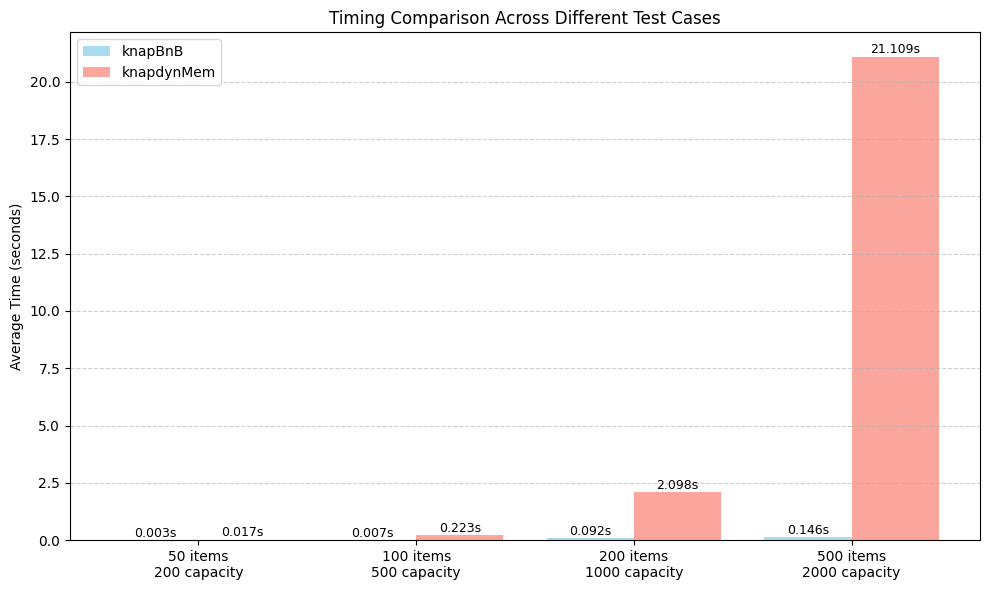

In [ ]:
def run_timing_comparison():
    # Define multiple test cases
    test_cases = [
        {"items": 50, "capacity": 200},  # Small number of items and small capacity
        {"items": 100, "capacity": 500},  # Moderate number of items and capacity
        {"items": 200, "capacity": 1000},  # Larger number of items and capacity
        {"items": 500, "capacity": 2000},  # Many items and large capacity
    ]

    # Store the results
    knapBnB_times = []
    knapdynMem_times = []
    labels = []

    for i, case in enumerate(test_cases):
        # Generate random test data
        values = [random.randint(1, 1000) for _ in range(case["items"])]
        weights = [random.randint(1, 200) for _ in range(case["items"])]
        quantities = [random.randint(1, 10) for _ in range(case["items"])]
        capacity = case["capacity"]

        # Time knapBnB
        knapBnB_time = timeit.timeit(
            lambda: knapBnB(values, weights, quantities, capacity),
            number=5  # Reduced for more cases
        ) / 5  # Average over 5 runs

        # Time knapdynMem
        knapdynMem_time = timeit.timeit(
            lambda: knapdynMem(values, weights, quantities, capacity),
            number=5
        ) / 5  # Average over 5 runs

        # Store results
        knapBnB_times.append(knapBnB_time)
        knapdynMem_times.append(knapdynMem_time)
        labels.append(f"{case['items']} items\n{case['capacity']} capacity")

    # Plot the results
    x = range(len(test_cases))
    width = 0.4

    plt.figure(figsize=(10, 6))
    plt.bar([p - width/2 for p in x], knapBnB_times, width, label='knapBnB', color='skyblue', alpha=0.7)
    plt.bar([p + width/2 for p in x], knapdynMem_times, width, label='knapdynMem', color='salmon', alpha=0.7)

    # Add labels and titles
    plt.xticks(x, labels, fontsize=10)
    plt.ylabel('Average Time (seconds)')
    plt.title('Timing Comparison Across Different Test Cases')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    # Add values above bars
    for i, (bnB_time, mem_time) in enumerate(zip(knapBnB_times, knapdynMem_times)):
        plt.text(i - width/2, bnB_time + 0.01, f"{bnB_time:.3f}s", ha='center', va='bottom', fontsize=9)
        plt.text(i + width/2, mem_time + 0.01, f"{mem_time:.3f}s", ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

# Run the comparison
run_timing_comparison()

# IV. Complexity analysis

With explanations, give the respective complexities of `knapfrac`, `knapdyn`, `knapdynMem`, and `knapBnB`.

Are the previous practical comparisons consistent with these theoretic results?

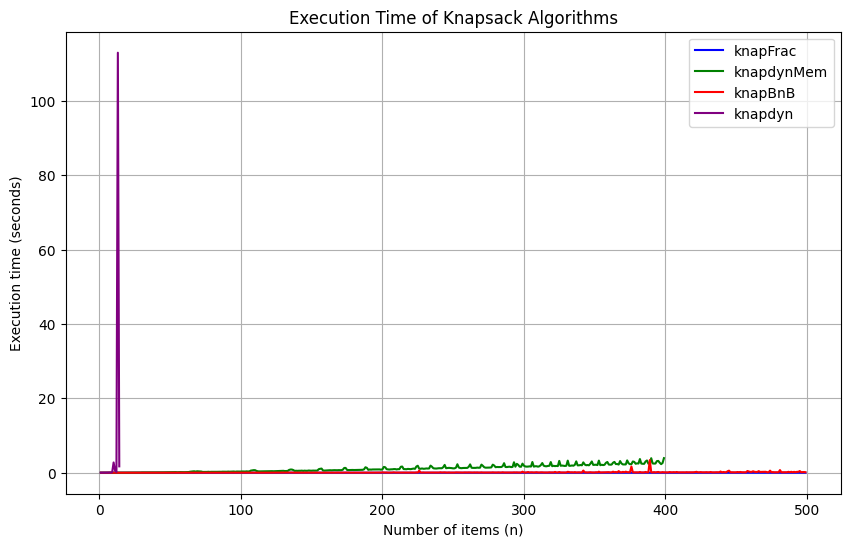

T-test between knapFrac and knapdynMem:
T-statistic: -28.1824, P-value: 0.0000
Significant Difference: Yes
----------------------------------------
T-test between knapFrac and knapBnB:
T-statistic: -10.3162, P-value: 0.0000
Significant Difference: Yes
----------------------------------------
T-test between knapFrac and knapdyn:
T-statistic: -6.5103, P-value: 0.0000
Significant Difference: Yes
----------------------------------------
T-test between knapdynMem and knapBnB:
T-statistic: 25.3284, P-value: 0.0000
Significant Difference: Yes
----------------------------------------
T-test between knapdynMem and knapdyn:
T-statistic: -4.9742, P-value: 0.0000
Significant Difference: Yes
----------------------------------------
T-test between knapBnB and knapdyn:
T-statistic: -6.4387, P-value: 0.0000
Significant Difference: Yes
----------------------------------------


In [ ]:
def compare_knapsack_algorithms():
    # Define the test size range
    n_values = [i for i in range(1, 500)]  # You can modify the range as needed

    # Containers for storing execution times
    time_knapFrac = []
    time_knapdynMem = []
    time_knapBnB = []
    time_knapdyn = []

    # Loop over each size n to measure the execution time
    for n in n_values:
        # Generate random values, weights, and quantities for each test
        values = [random.randint(1, 100) for _ in range(n)]
        weights = [random.randint(1, 100) for _ in range(n)]
        quantities = [random.randint(1, 10) for _ in range(n)]
        capacity = 500

        # Measure time for knapFrac
        time_knapFrac.append(timeit.timeit(lambda: knapfrac(values, weights, quantities, capacity), number=1))

        # Measure time for knapdynMem
        if n < 400:
            time_knapdynMem.append(timeit.timeit(lambda: knapdynMem(values, weights, quantities, capacity), number=1))
        else:
            time_knapdynMem.append(math.inf)

        # Measure time for knapBnB
        time_knapBnB.append(timeit.timeit(lambda: knapBnB(values, weights, quantities, capacity), number=1))

        # Measure time for knapdyn
        if n < 15:
            time_knapdyn.append(timeit.timeit(lambda: knapdyn(values, weights, quantities, capacity), number=1))
        else:
            time_knapdyn.append(math.inf)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, time_knapFrac, label="knapFrac", color="blue")
    plt.plot(n_values, time_knapdynMem, label="knapdynMem", color="green")
    plt.plot(n_values, time_knapBnB, label="knapBnB", color="red")
    plt.plot(n_values, time_knapdyn, label="knapdyn", color="purple")
    plt.xlabel("Number of items (n)")
    plt.ylabel("Execution time (seconds)")
    plt.title("Execution Time of Knapsack Algorithms")
    plt.legend()
    plt.grid()
    plt.show()

    # Perform t-test to compare execution times of knapfrac with other algorithms
    # The t-test checks if there is a statistically significant difference between two sets of data.
    # A low p-value (typically < 0.05) indicates a significant difference between the execution times.
    def ttest_comparison(label1, label2, time1, time2):
        # Remove the inf values to perform the t-test
        time1_cleaned = [t for t in time1 if t != math.inf]
        time2_cleaned = [t for t in time2 if t != math.inf]

        if len(time1_cleaned) > 1 and len(time2_cleaned) > 1:  # Ensure there are enough data points
            t_stat, p_value = stats.ttest_ind(time1_cleaned, time2_cleaned)
            print(f"T-test between {label1} and {label2}:")
            print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
            print("Significant Difference:" , "Yes" if p_value < 0.05 else "No")
            print("-" * 40)
        else:
            print(f"Not enough data to perform t-test between {label1} and {label2}.")
            print("-" * 40)

    # Compare each pair of algorithms using t-tests
    ttest_comparison("knapFrac", "knapdynMem", time_knapFrac, time_knapdynMem)
    ttest_comparison("knapFrac", "knapBnB", time_knapFrac, time_knapBnB)
    ttest_comparison("knapFrac", "knapdyn", time_knapFrac, time_knapdyn)
    ttest_comparison("knapdynMem", "knapBnB", time_knapdynMem, time_knapBnB)
    ttest_comparison("knapdynMem", "knapdyn", time_knapdynMem, time_knapdyn)
    ttest_comparison("knapBnB", "knapdyn", time_knapBnB, time_knapdyn)

# Call the function
compare_knapsack_algorithms()



## **Answer (Execution Time Comparison of Knapsack Algorithms)**

From the graph above, we can observe the execution times of four knapsack algorithms with respect to the number of items $n$, each plotted over a range of values: `knapfrac`, `knapdyn`, `knapdynMem`, and `knapBnB`.

### **`knapfrac` (Fractional Knapsack)**
- **Time Complexity**: $O(nlogn)$
- This algorithm is the fastest, consistent with the theoretical expectation. As the number of items increases, the execution time grows smoothly, reflecting the algorithm’s efficiency in handling larger inputs. It has a manageable runtime, and since it only uses fractional values, it performs optimally for large datasets.

### **`knapdyn` (Dynamic Programming)**
- **Time Complexity**: Exponential in the worst case.
- As expected, this algorithm exhibits a rapid increase in execution time as $n$ grows. The exponential nature of the worst-case complexity is evident, and the algorithm begins to suffer as the input size increases. In contrast to `knapfrac`, it cannot handle larger problem sizes as efficiently.

### **`knapdynMem` (Dynamic Programming with Memoization)**
- **Time Complexity**: Also exponential in the worst case.
- Although memoization helps avoid redundant recalculations, it does not change the algorithm's exponential worst-case behavior. There exist contrived examples where memoization does not improve performance significantly. We will give such an example later. This is reflected in the higher execution times compared to `knapfrac`.

### **`knapBnB` (Branch and Bound)**
- **Time Complexity**: Exponential, but performs better than expected in practice.
- Branch and Bound (BnB) exhibits a non-monotonic execution time pattern, with a few peaks as the algorithm explores the solution space. While the worst-case scenario involves exploring all nodes (which is exponential), the pruning mechanism significantly reduces the number of explored branches in practice. This results in better performance than pure dynamic programming in many cases, as seen in the graph. The BnB algorithm is especially effective when a significant portion of the search space can be discarded early.


## **Detailed Answer**

### **Fractional Knapsack Complexity (`knapfrac`)**

**Assumptions**: Without loss of generality, suppose the values ($V$) and weights ($W$) are sorted such that:

$$
\frac{v_1}{w_1} \geq \frac{v_2}{w_2} \geq \dots \geq \frac{v_n}{w_n}
$$

**Solution**:  
The solution to the fractional knapsack problem (continuous case) can be constructed as follows:

1. Take the maximum possible quantity of item 1.
2. Take the maximum possible quantity of item 2.  
   .  
   .  
   .  
3. Repeat this process until the knapsack is completely filled.

**Complexity analysis**:

1. **Sorting** $V$ and $W$ in the order described above: $O(nlog n)$.
2. **Selecting items** from 1 to $n$: $O(n)$.

**Total complexity**: $O(nlogn)$.

---

### **Dynamic Knapsack Complexity (`knapdyn`)**

Let $V = [v_1, v_2, \dots, v_n]$ be the values, $W = [w_1, w_2, \dots, w_n]$ the weights, $B = [b_1, b_2, \dots, b_n]$ the bounds, and $\mathcal{W}$ the knapsack capacity.

We compute $knapdyn(V, W, B, \mathcal{W})$ recursively as follows:

$$
knapdyn(V, W, B, \mathcal{W}) = \max_{i=0}^{b_1} \left( i \cdot v_1 + knapdyn(V_1, W_1, B_1, \mathcal{W} - i \cdot w_1) \quad | \quad \mathcal{W} - i \cdot w_1 \geq 0 \right),
$$
where $V_1 = [v_2, \dots, v_n]$, $W_1 = [w_2, \dots, w_n]$, and $B_1 = [b_2, \dots, b_n]$.

**Tree representation**:

The recursion generates a tree with subproblems. Below is a schematic tree representation:
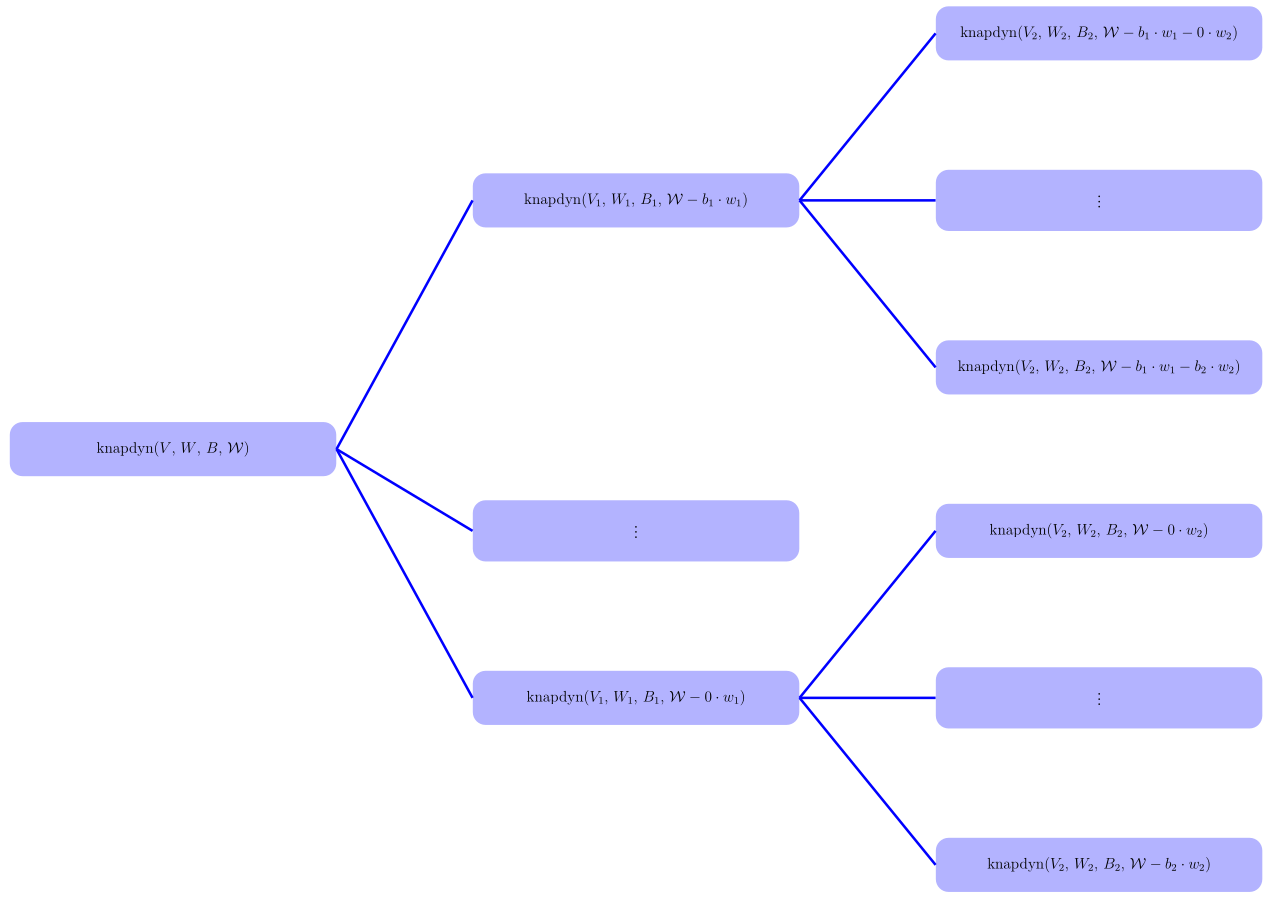

At each depth $i \in \{1, \dots, n\}$ of the tree, there are at most:

$$
\prod_{j=1}^{i} (b_j + 1)
$$

subproblems to solve. Once the subproblems at depth $i$ are solved, we compute the one above.

**Complexity analysis:**

1. At depth $i$, we compute the maximum between all the subproblems. Hence the complexity is:

$$
O \left( \prod_{j=1}^{i} (b_j + 1) \right).
$$

2. The total complexity is exponential:

$$
O \left( (b_{\text{max}} + 1)^n \right),
$$

where $b_{\text{max}} = \max \{b_i \mid i \in \{1, \dots, n\} \}$.

**Detailed derivation**:

$$
\sum_{i=1}^n  O  \left( \prod_{j=1}^{i} (b_j + 1) \right) = O \left(\sum_{i=1}^n \left( \prod_{j=1}^{i} (b_j + 1) \right)\right) \leq O \left(\sum_{i=1}^n \left( \prod_{j=1}^{i} (b_{\text{max}} + 1) \right)\right) \leq O \left(\sum_{i=1}^n (b_{\text{max}} + 1)^i \right) \leq O \left( \frac{(b_{\text{max}} + 1)^n - 1}{b_{\text{max}} +1 - 1} \right).
$$

For $n \to \infty$, this simplifies to:

$$
O \left( (b_{\text{max}} + 1)^n \right).
$$

If $b_i = 1$ for all $i$, the complexity reduces to:

$$
O(2^n).
$$

---

### **Dynamic Knapsack with Memoization Complexity (`knapdynMem`)**

We use a dictionary to store the results of each subproblem. The key is defined as a tuple
$(len(V_{\text{SubProblem}}), \mathcal{W}_{\text{SubProblem}}). $

**Subproblem reuse:**

Suppose we have two computations:

1. $$ knapdynMem(V_i, W_i, B_i, \mathcal{W}_i) $$
2. $$ knapdynMem(V_j, W_j, B_j, \mathcal{W}_j) $$

If $ len(V_i) = len(V_j), $ then $ V_i = V_j $ due to the construction of the algorithm, and both subproblems are at the same depth in the decision tree.  
Thus, $ W_i = W_j $ and $ B_i = B_j. $  

If $ \mathcal{W}_i = \mathcal{W}_j, $ the two computations will return the same value. Otherwise, they must be computed separately.

Two subproblems must be at the same depth.

**Claim:** We can construct an example where all subproblems are distinct.

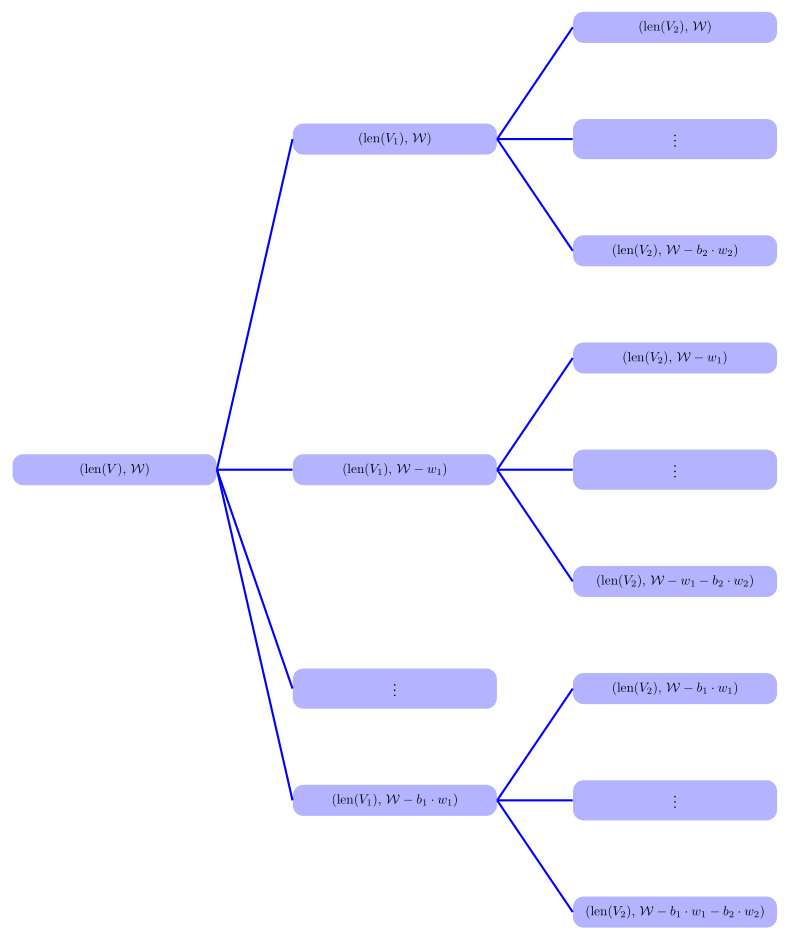

**Construction of subproblems:**

**Depth 1:**
At depth 1, $ \forall i, j \in \{0, 1, ..., b_1\}^2 $ with $ i \neq j, $ we ensure:
$$
\mathcal{W} - i \cdot w_1 \neq \mathcal{W} - j \cdot w_1 \quad ∀ w_1 \in \mathbb{R}^+.
$$
This results in $ b_1 + 1 $ unique keys in the dictionary.

**Depth 2:**
The keys in the dictionary are defined as:
$$
K = \left\{ \left( len(V_2), \mathcal{W} - i \cdot w_1 - j \cdot w_2 \right) \, \middle| \, i \in \{0, 1, ..., b_1\}, j \in \{0, 1, ..., b_2\} \right\}.
$$
If $ |K| = (b_1 + 1)(b_2 + 1), $ all keys are unique.

**Ensuring uniqueness:**

To ensure all keys are unique, let $ w_1 $ and $ w_2 $ be two irrational numbers such that $ ∄ k \in \mathbb{N} $ where $ w_1 = k \cdot w_2. $ All keys are unique.

Define the function:
$$
f: [0, b_1] \times [0, b_2] \to K_w^2,
$$
$$
(i, j) \mapsto \mathcal{W} - i \cdot w_1 - j \cdot w_2,
$$
where:
$$
K_w^2 = \left\{ \mathcal{W} - i \cdot w_1 - j \cdot w_2 \, \middle| \, i \in [0, b_1], j \in [0, b_2] \right\}.
$$

**Proof of bijectivity:**

Let $ (i, j) $ and $ (\tilde{i}, \tilde{j}) $ be distinct pairs such that $ f(i, j) = f(\tilde{i}, \tilde{j}). $ Then:
$$
\mathcal{W} - i \cdot w_1 - j \cdot w_2 = \mathcal{W} - \tilde{i} \cdot w_1 - \tilde{j} \cdot w_2 ⟺ (i - \tilde{i}) \cdot \frac{w_1}{w_2} = \tilde{j} - j.
$$
Since $ \frac{w_1}{w_2} \in \mathbb{R}$ \ $\mathbb{Q} $ (irrational), this is a contradiction, as the left-hand side is irrational while the right-hand side is an integer. Thus, $ f $ is injective, and all keys at depth 2 are unique.

Finally:
$$
|[0, b_1] \times [0, b_2]| = |K_w^2|.
$$
Thus, $f$ is bijective, and all the keys at depth 2 are unique.

**Generalizing to depth $ k $:**

At depth $ k $, define:
$$
f: \prod_{i=1}^k [0, b_i] \to K_w^k,
$$
$$
(i_1, ..., i_k) \mapsto \mathcal{W} - \sum_{j=1}^k i_j \cdot w_j,
$$
where:
$$
K_w^k = \left\{ \mathcal{W} - \sum_{j=1}^k i_j \cdot w_j \right\}.
$$

Using the same logic, $f$ is injective if $(w_1, ..., w_k)$ are chosen such that no two are rational multiples of each other. Since $\mathbb{R} \setminus \mathbb{Q}$ is dense in $\mathbb{R}$, we can always find such a set $(w_1, ..., w_k)$.

Thus, for all $(i_1, ..., i_k) \neq (\tilde{i}_1, ..., \tilde{i}_k)$, we have $f(i_1, ..., i_k) \neq f(\tilde{i}_1, ..., \tilde{i}_k)$.

Finally:
$$
\left| \prod_{i=1}^k [0, b_i] \right| = |K_w^k|.
$$
This bijection ensures that all keys at depth $k$ are unique.

**Conclusion:**

We can construct a case where all keys are distinct. In the worst case, the complexity of `knapdynMem` is exponential:
$$
O((b_{\text{max}} + 1)^n),
$$
where $$ b_{\text{max}} = \max \{b_i \, | \, i \in \{1, ..., n\}\}. $$

---

### **Branch and Bound Complexity (`knapBnb`)**

We can construct an example where the search algorithm can explore the entire graph.

In the worst case, the algorithm might be forced to explore nearly all possible combinations before finding the optimal solution. Therefore, the computation time in the worst case is exponential. However, on average, branch-and-bound performs better. In fact, it eliminates the exponential growth of branches by pruning parts of the search space.



**Example (100 items):**

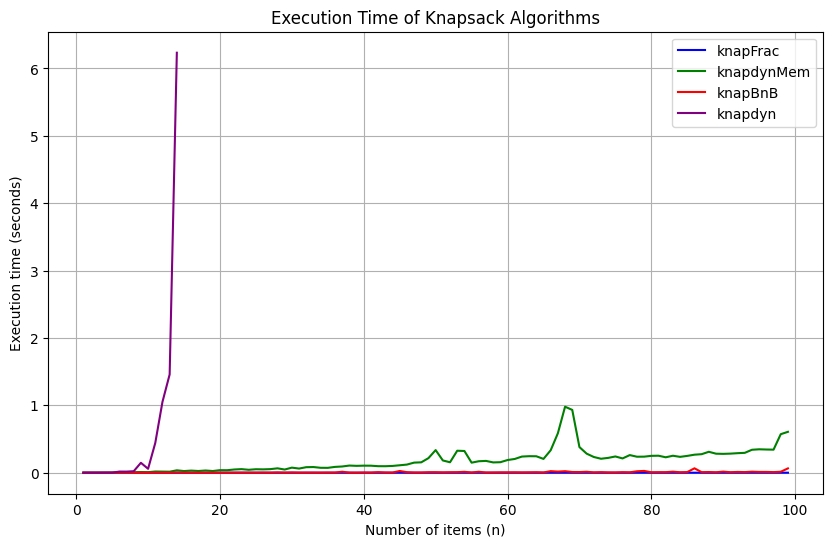

**Example (200 items):**

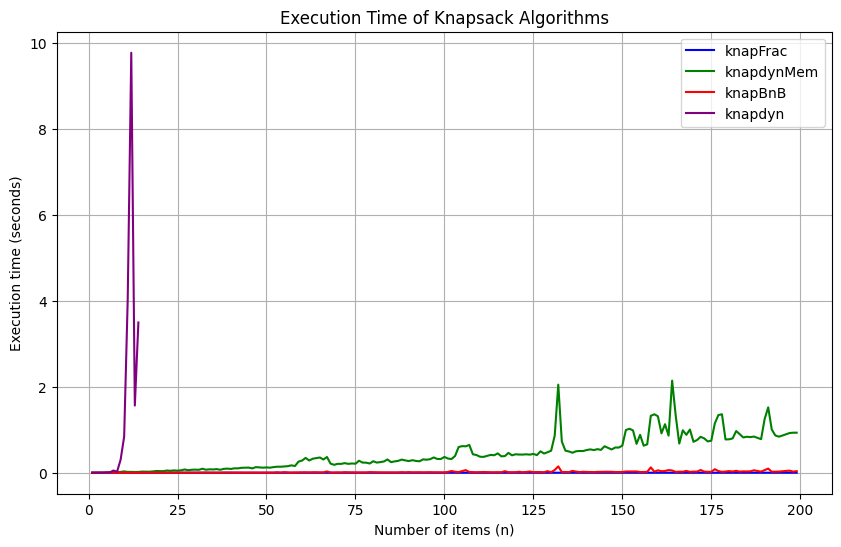

**Example (500 items):**

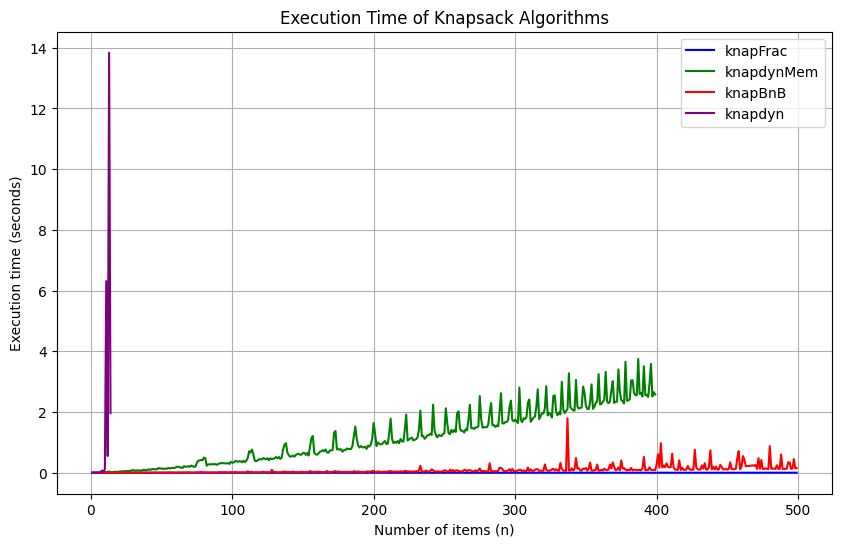

**Example (1000 items):**

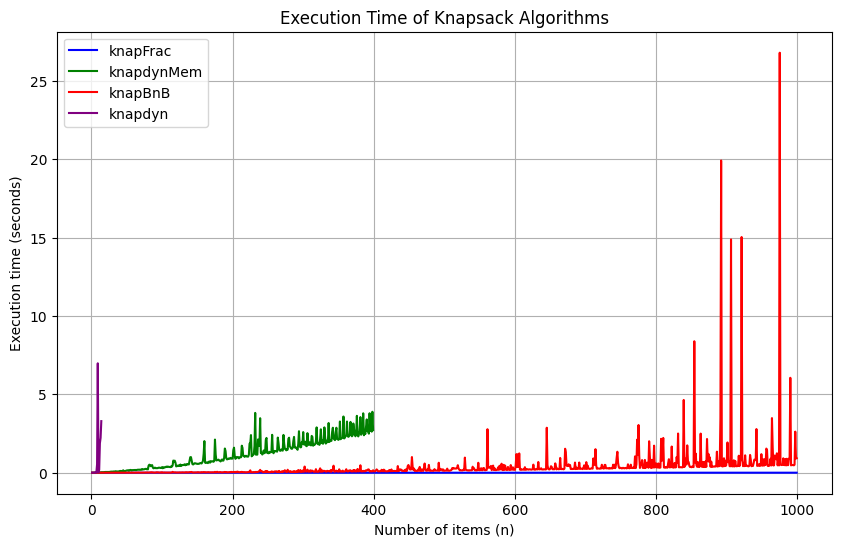

# V. Unbounded Knapsack

In the unbounded version, there are no limitations on the quantity of each item that can be taken.

**Q1.** How can the previous functions can be used to solve the unbounded knapsack version?


**Answer** : In the unbounded knapsack problem, there are no restrictions on the number of times an item can be taken. However, the total number of items we can include in the knapsack is constrained by its capacity. For each item $i \in I$, the maximum number of times it can be taken is $\lceil \frac{\mathcal{W}}{w_i} \rceil$, where $\mathcal{W}$ represents the knapsack's capacity and $w_i$ is the weight of item $i$.

Thus, the unbounded knapsack problem can be solved using the same functions as for the bounded version (such as KnapBnB, KnapMem, etc.) by adjusting the quantity of each item according to its upper bound. Specifically, for each item $i \in I$, we define the upper bound on the quantity of item $i$ as:

$$
b_i = \lceil \frac{\mathcal{W}}{w_i} \rceil
$$

This ensures that the problem remains feasible while still allowing us to solve it using the same techniques as for the bounded knapsack problem.


In [ ]:
def unbounded_knapsack(values, weights, capacity):
  '''
  Solves the Unbounded Knapsack problem using the Branch and Bound (BnB) method.

  Parameters:
  values (list): List of values for each item.
  weights (list): List of weights for each item.
  capacity (int): Maximum weight capacity of the knapsack.

  Returns:
  Solution (varies): The result of solving the Unbounded Knapsack problem,
                      obtained by calling the knapBnB function.
  '''
  quantities = []
  for i in weights:
    quantities.append(int(capacity/i) + 1)

  return knapBnB(values, weights,quantities,capacity)

In [ ]:
def run_tests_unbounded_knapsack():
    # Test 1: Small items with moderate capacity
    values = [80, 90, 100]
    weights = [10, 20, 30]
    capacity = 60
    # Expected max value: Take 6 items of weight 10 (6 * 80 = 480)
    max_value, quantities_taken = unbounded_knapsack(values, weights, capacity)
    assert max_value == 480, f"Test 1 failed: expected 480, got {max_value}"
    print(f"Test 1 passed: max_value={max_value}, quantities_taken={quantities_taken}")

    # Test 2: Small capacity with high-value items
    values = [300, 500, 700]
    weights = [20, 25, 30]
    capacity = 50
    max_value, quantities_taken = unbounded_knapsack(values, weights, capacity)
    assert max_value == 1000, f"Test 2 failed: expected 1000, got {max_value}"
    print(f"Test 2 passed: max_value={max_value}, quantities_taken={quantities_taken}")

    # Test 3: Larger capacity and more items
    values = [120, 150, 80, 200]
    weights = [40, 50, 30, 60]
    capacity = 150
    max_value, quantities_taken = unbounded_knapsack(values, weights, capacity)
    assert max_value == 480, f"Test 3 failed: expected 480, got {max_value}"
    print(f"Test 3 passed: max_value={max_value}, quantities_taken={quantities_taken}")

    # Test 4: Edge case with very small capacity
    values = [200, 300, 400]
    weights = [100, 100, 100]
    capacity = 50
    # Expected max value: No item can be taken as capacity is too small
    max_value, quantities_taken = unbounded_knapsack(values, weights, capacity)
    assert max_value == 0, f"Test 4 failed: expected 0, got {max_value}"
    print(f"Test 4 passed: max_value={max_value}, quantities_taken={quantities_taken}")

    # Test 5: Randomized test with many items
    import random
    values = [random.randint(1, 1000) for _ in range(100)]
    weights = [random.randint(1, 200) for _ in range(100)]
    capacity = 991
    try:
        max_value, quantities_taken = unbounded_knapsack(values, weights, capacity)
        print(f"Test 5 passed: max_value={max_value}, quantities_taken={quantities_taken}")
    except Exception as e:
        print(f"Test 5 failed with exception: {e}")

    # Test 6: Large-scale randomized test
    values = [random.randint(1, 10000) for _ in range(500)]
    weights = [random.randint(1, 20000) for _ in range(500)]
    capacity = 991
    try:
        max_value, quantities_taken = unbounded_knapsack(values, weights, capacity)
        print(f"Test 6 passed: max_value={max_value}, quantities_taken={quantities_taken}")
    except Exception as e:
        print(f"Test 6 failed with exception: {e}")

    # Test 7: All items have the same value per unit weight
    values = [100, 200, 300]
    weights = [10, 20, 30]
    capacity = 60
    # Expected max value: Any combination of items will yield the same total value (600)
    max_value, quantities_taken = unbounded_knapsack(values, weights, capacity)
    assert max_value == 600, f"Test 7 failed: expected 600, got {max_value}"
    print(f"Test 7 passed: max_value={max_value}, quantities_taken={quantities_taken}")

    # Test 8: Items with weights greater than capacity
    values = [100, 200, 300]
    weights = [110, 120, 130]
    capacity = 100
    # Expected max value: No item can be taken
    max_value, quantities_taken = unbounded_knapsack(values, weights, capacity)
    assert max_value == 0, f"Test 8 failed: expected 0, got {max_value}"
    print(f"Test 8 passed: max_value={max_value}, quantities_taken={quantities_taken}")

    # Test 9: Multiple items with fractional ratios
    values = [120, 280, 150]
    weights = [30, 70, 40]
    capacity = 100
    # Expected max value: Use item 1 and item 2 optimally
    max_value, quantities_taken = unbounded_knapsack(values, weights, capacity)
    assert max_value == 400, f"Test 9 failed: expected 400, got {max_value}"
    print(f"Test 9 passed: max_value={max_value}, quantities_taken={quantities_taken}")

    # Test 10: High-value lightweight item dominates
    values = [1, 2, 1000]
    weights = [100, 200, 1]
    capacity = 50
    # Expected max value: Use the third item exclusively (50 * 1000 = 50000)
    max_value, quantities_taken = unbounded_knapsack(values, weights, capacity)
    assert max_value == 50000, f"Test 10 failed: expected 50000, got {max_value}"
    print(f"Test 10 passed: max_value={max_value}, quantities_taken={quantities_taken}")

    # Test 11: Capacity is zero
    values = [10, 20, 30]
    weights = [1, 2, 3]
    capacity = 0
    # Expected max value: No items can be taken
    max_value, quantities_taken = unbounded_knapsack(values, weights, capacity)
    assert max_value == 0, f"Test 11 failed: expected 0, got {max_value}"
    print(f"Test 11 passed: max_value={max_value}, quantities_taken={quantities_taken}")

# Run the tests directly
run_tests_unbounded_knapsack()

Test 1 passed: max_value=480.0, quantities_taken=[6, 0, 0]
Test 2 passed: max_value=1000.0, quantities_taken=[1, 0, 1]
Test 3 passed: max_value=480.0, quantities_taken=[2, 0, 0, 1]
Test 4 passed: max_value=0.0, quantities_taken=[0, 0, 0]
Test 5 passed: max_value=131274.0, quantities_taken=[198, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Test 6 passed: max_value=1055505.0, quantities_taken=[165, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 